每个用户的直接朋友: {'Yanyan-Wang': ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin'], 'Aarebecca': ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy'], 'pomelo-nwu': ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975'], 'tyn1998': ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 'yvon

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21716\2323550338.py:84: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='影响力分数')
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21709 (\N{CJK UNIFIED IDEOGRAPH-54CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font

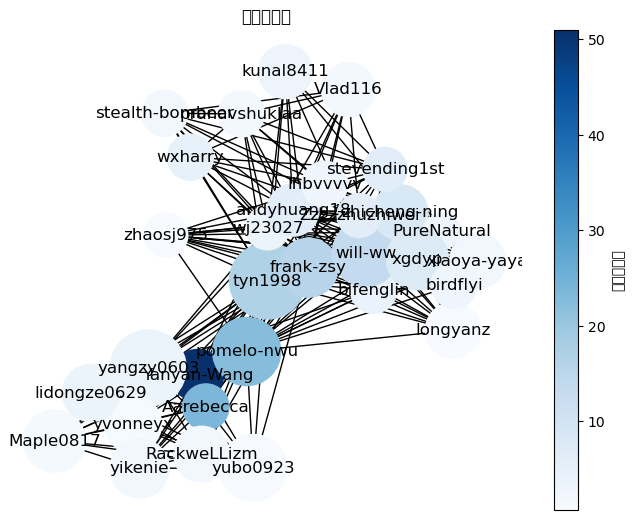

In [4]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# 读取数据
with open('hw4_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

nodes = data['nodes']
edges = data['edges']

# 初始化社交网络字典
network = {user[0]: {} for user in nodes}  # 用户作为键，值是空字典

# 添加边
for user1, user2, weight in edges:
    network[user1][user2] = weight  # user1 和 user2 的连接
    network[user2][user1] = weight  # 反向连接

# 1. 社交网络构建与分析
# a. 找出每个用户的直接朋友
direct_friends = {user: list(friends.keys()) for user, friends in network.items()}
print("每个用户的直接朋友:", direct_friends)

# 2. 统计与度中心性分析
# a. 计算每个用户的度数
degree_counts = {user: len(friends) for user, friends in network.items()}
top_5_degrees = sorted(degree_counts.items(), key=lambda x: x[1], reverse=True)[:5]
print("度数最多的前5个用户及其朋友数量:", top_5_degrees)

# b. 影响力最高的前5个用户
influence_scores = {user[0]: user[1] for user in nodes}
top_5_influencers = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("影响力最高的前5个用户:", top_5_influencers)

# c. 综合考虑影响力和朋友数量
combined_influence = {
    user: 0.5 * influence_scores[user] + 0.5 * degree_counts[user]
    for user in network
}
top_5_combined_influence = sorted(combined_influence.items(), key=lambda x: x[1], reverse=True)[:5]
print("综合考虑影响力和朋友数量的前5个用户:", top_5_combined_influence)

# 3. 推荐新朋友
def recommend_friends(user):
    friends = direct_friends[user]
    friend_of_friends = {}
    
    for friend in friends:
        for fof in direct_friends[friend]:
            if fof != user and fof not in friends:
                friend_of_friends[fof] = friend_of_friends.get(fof, 0) + 1
                
    return sorted(friend_of_friends.items(), key=lambda x: x[1], reverse=True)

recommendations_for_yanyan = recommend_friends("Yanyan-Wang")
print("推荐的新朋友:", recommendations_for_yanyan)

# d. 找出与 Yanyan-Wang 连接强度最高的5个用户
strengths = {user: network["Yanyan-Wang"].get(user, 0) for user in network if user != "Yanyan-Wang"}
top_5_strengths = sorted(strengths.items(), key=lambda x: x[1], reverse=True)[:5]
print("与 Yanyan-Wang 连接强度最高的5个用户:", top_5_strengths)

# 4. 网络图的可视化
G = nx.Graph()  # 创建一个无向图

# 添加节点和边
for user, friends in network.items():
    G.add_node(user, influence=influence_scores[user])
    for friend, weight in friends.items():
        G.add_edge(user, friend, weight=weight)

# 设置节点位置和大小
pos = nx.spring_layout(G)
node_sizes = [len(friends) * 100 for friends in network.values()]  # 根据朋友数量设置节点大小
node_colors = [influence_scores[user] for user in G.nodes()]  # 根据影响力分数设置节点颜色

# 绘制图形
nodes = nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # 这个空数组用于创建colorbar
plt.colorbar(sm, label='影响力分数')

plt.title("社交网络图")
plt.show()

